   Tahun  Covid  Jumlah Wisatawan
0   2012      0            223126
1   2013      0            241833
2   2014      0            259299
3   2015      0            270837
4   2016      0            233643


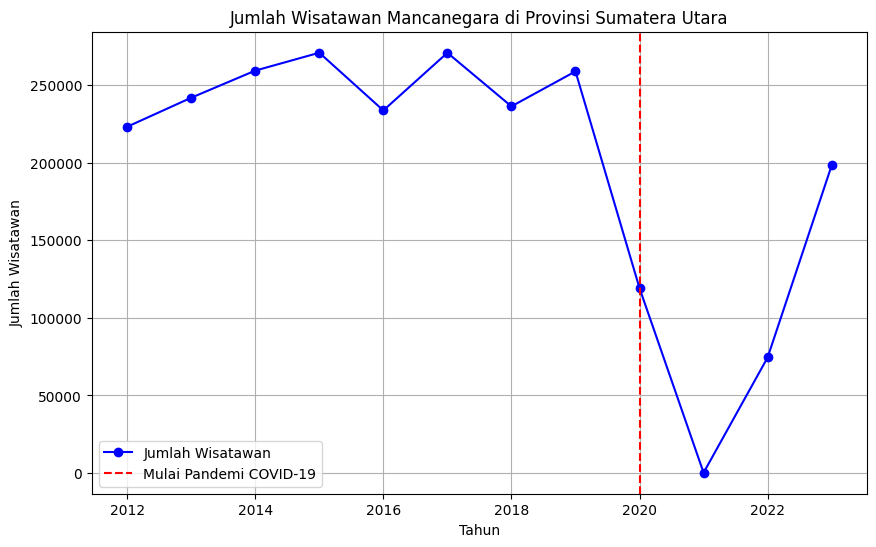

Mean Squared Error: 12799126678.340567
R² Score: -0.4904147959806404


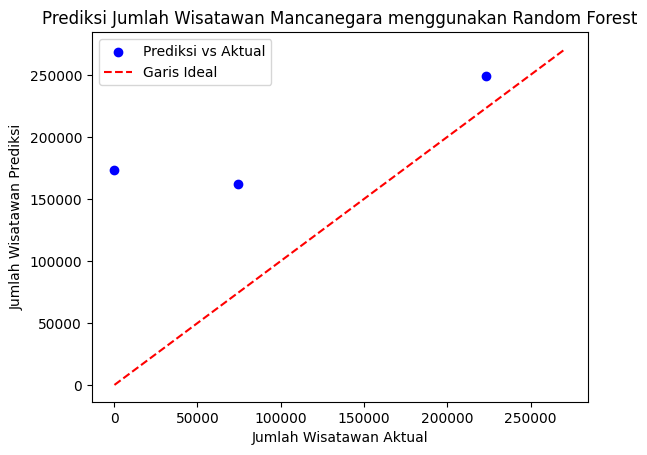

Prediksi jumlah wisatawan untuk tahun 2025 dengan dampak COVID 1: 161892.48


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Membaca data
data = pd.read_csv('jumlah_wisatawan.csv')  # Untuk membaca dataset
print(data.head())

# a. Visualisasi Data Jumlah Wisatawan
plt.figure(figsize=(10, 6))
plt.plot(data['Tahun'], data['Jumlah Wisatawan'], marker='o', linestyle='-', color='blue', label='Jumlah Wisatawan')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Wisatawan')
plt.title('Jumlah Wisatawan Mancanegara di Provinsi Sumatera Utara')
plt.axvline(x=2020, color='red', linestyle='--', label='Mulai Pandemi COVID-19')  # Garis vertikal untuk tahun pandemi
plt.legend()
plt.grid()
plt.show()

# 2. Pra-pemrosesan data
# Misalkan data memiliki kolom 'Tahun', 'Covid', dan 'Jumlah Wisatawan'
X = data[['Tahun', 'Covid']].values
y = data['Jumlah Wisatawan'].values

# 3. Memisahkan data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Membangun model Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Melakukan prediksi
y_pred = model.predict(X_test)

# 6. Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# 7. Menampilkan hasil
plt.scatter(y_test, y_pred, color='blue', label='Prediksi vs Aktual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Garis Ideal')
plt.xlabel('Jumlah Wisatawan Aktual')
plt.ylabel('Jumlah Wisatawan Prediksi')
plt.title('Prediksi Jumlah Wisatawan Mancanegara menggunakan Random Forest')
plt.legend()
plt.show()

# Prediksi untuk tahun tertentu dan dampak COVID
tahun_prediksi = np.array([[2025, 1]])  # Ganti dengan tahun dan dampak COVID yang diinginkan
jumlah_prediksi = model.predict(tahun_prediksi)
print(f'Prediksi jumlah wisatawan untuk tahun {tahun_prediksi[0][0]} dengan dampak COVID {tahun_prediksi[0][1]}: {jumlah_prediksi[0]}')
